# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [1]:
# Let's get started importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv('ames_train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12152a438>,
      dtype=object)

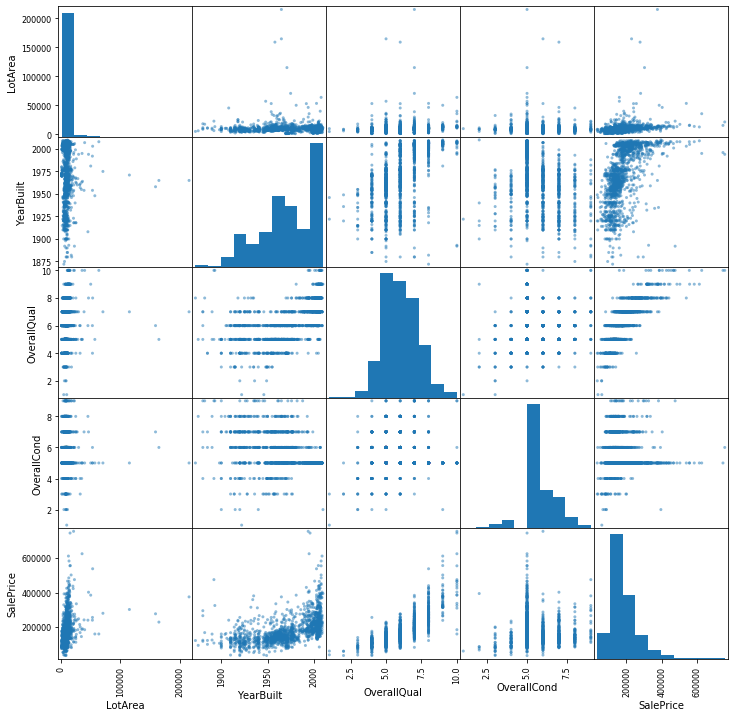

In [4]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df[['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'SalePrice']],figsize = (12,12))

Text(0, 0.5, 'Number of Properties')

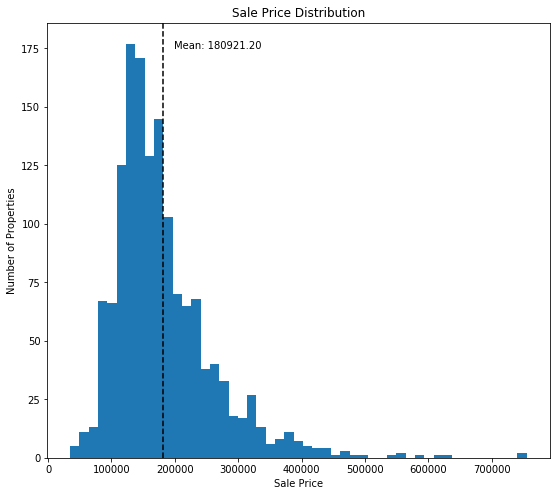

In [45]:
# Create a plot that shows the SalesPrice Distribution
fig, axes = plt.subplots(figsize=(9,8))
axes.hist(df['SalePrice'], bins='auto')
axes.axvline(df['SalePrice'].mean(), linestyle = '--', color = 'black')
axes.text(df['SalePrice'].mean()*1.1, 175, 'Mean: {:.2f}'.format(df['SalePrice'].mean()))
axes.set_title('Sale Price Distribution')
axes.set_xlabel('Sale Price')
axes.set_ylabel('Number of Properties')

Text(0, 0.5, 'Number of Properties')

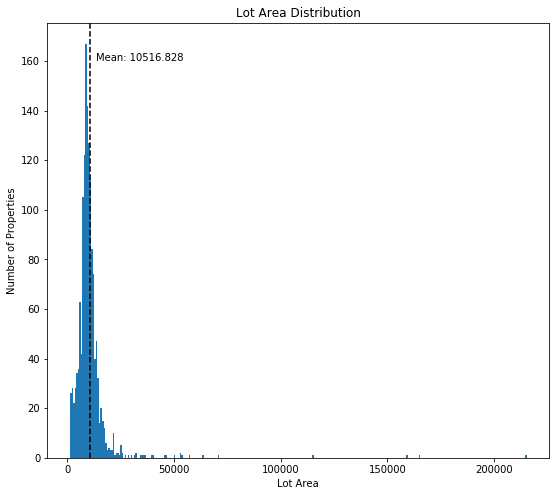

In [46]:
# Create a plot that shows the LotArea Distribution
fig, axes = plt.subplots(figsize=(9,8))
axes.hist(df['LotArea'], bins='auto')
axes.axvline(df['LotArea'].mean(), linestyle='--', color='black')
axes.text(df['LotArea'].mean()*1.3, 160, 'Mean: {:.3f}'.format(df['LotArea'].mean()))
axes.set_title('Lot Area Distribution')
axes.set_xlabel('Lot Area')
axes.set_ylabel('Number of Properties')

Text(0, 0.5, 'Number of Properties')

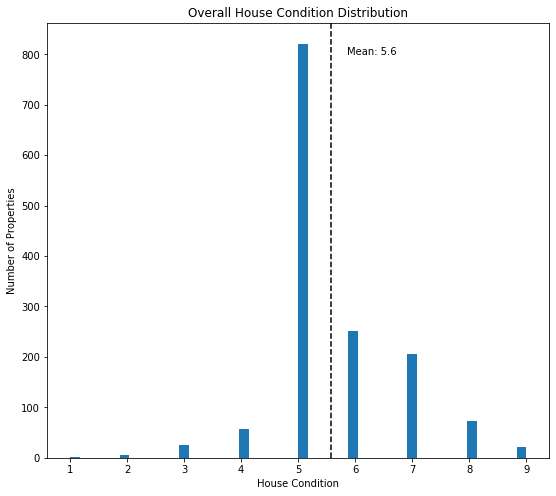

In [55]:
# Create a plot that shows the Distribution of the overall house condition
fig, axes = plt.subplots(figsize=(9,8))
axes.hist(df['OverallCond'], bins='auto')
axes.axvline(df['OverallCond'].mean(), linestyle='--', color='black')
axes.text(df['OverallCond'].mean()*1.05, 800, 'Mean: {:.1f}'.format(df['OverallCond'].mean()))
axes.set_title('Overall House Condition Distribution')
axes.set_xlabel('House Condition')
axes.set_ylabel('Number of Properties')

In [69]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.7, 755000, 'True Maximum: 755000.00')

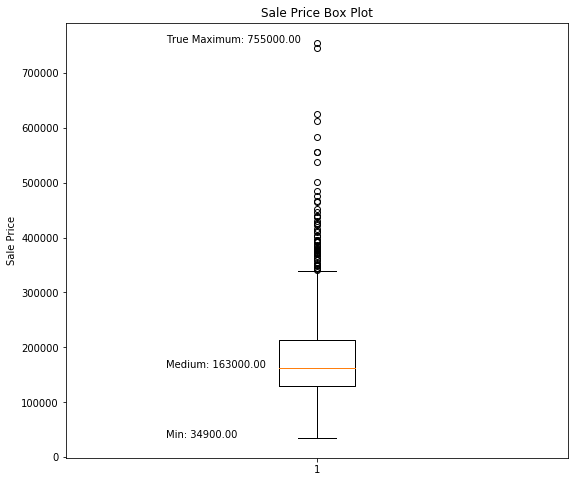

In [82]:
# Create a Box Plot for SalePrice
fig, axes = plt.subplots(figsize=(9,8))
axes.boxplot(df['SalePrice'])
axes.set_title('Sale Price Box Plot')
axes.set_ylabel('Sale Price')
axes.text(.7, df['SalePrice'].median(), 'Medium: {:.2f}'.format(df['SalePrice'].median()))
axes.text(.7, df['SalePrice'].min(), 'Min: {:.2f}'.format(df['SalePrice'].min()))
axes.text(.7, df['SalePrice'].max(), 'True Maximum: {:.2f}'.format(df['SalePrice'].max()))
# Q1 = df['SalePrice'].quantile(0.25)
# Q3 = df['SalePrice'].quantile(0.75)
# IQR = Q3 - Q1

         
# axes.text(.7, (Q3 + (1.5*IQR)), 'Maximum: {:.2f}'.format((Q3 + (1.5*IQR)))

In [ ]:
# Perform an Exploration of home values by age

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!